<a href="https://colab.research.google.com/github/anushree0001/flood-/blob/main/Flood_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Flood prediction

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/anushree0001/flood-/main/flood_dataset_classification.csv"
df = pd.read_csv(url)

df.head()

,Disaster Type,Latitude,Longitude,Total Deaths,Total Affected,duration,time,Rainfall,Elevation,Slope,distance,occured
0,0,52.6717,-0.2995,300.0,3000.0,0.0,1900,1383.125626,11.0,1.788207,0.0,1
1,0,35.6897,139.6920,1379.0,13790.0,0.0,1909,1383.125626,49.0,24.356508,0.0,1
2,0,39.9050,116.3910,100000.0,1000000.0,0.0,1909,580.345856,55.0,8.374380,0.0,1
3,0,23.1288,113.2590,0.0,3000000.0,0.0,1912,2993.401777,7.0,12.917221,0.0,1
4,0,39.1467,117.2060,0.0,635000.0,0.0,1913,1383.125626,3.0,1.513093,0.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Disaster Type   6237 non-null   int64  
 1   Latitude        6237 non-null   float64
 2   Longitude       6237 non-null   float64
 3   Total Deaths    6237 non-null   float64
 4   Total Affected  6237 non-null   float64
 5   duration        6237 non-null   float64
 6   time            6237 non-null   int64  
 7   Rainfall        6237 non-null   float64
 8   Elevation       6237 non-null   float64
 9   Slope           6237 non-null   float64
 10  distance        6237 non-null   float64
 11  occured         6237 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 584.8 KB


In [ ]:
print("Missing values per column:")
df.isnull().sum()
# Check if disaster_type varies
print(df['Disaster Type'].value_counts())

# If all same or unexplained, drop it
df.drop('Disaster Type', axis=1, inplace=True)

Missing values per column:
Disaster Type
0    4192
2    1177
4     535
1     333
Name: count, dtype: int64


In [ ]:
# Convert all columns to float
df = df.astype(float, errors='ignore')

In [ ]:
df.fillna(df.median(numeric_only=True), inplace=True)  # Fill numeric columns with median
df.head(5000
      )



,Latitude,Longitude,Total Deaths,Total Affected,duration,time,Rainfall,Elevation,Slope,distance,occured
0,52.671700,-0.299500,300.0,3000.0,0.0,1900.0,1383.125626,11.0,1.788207,0.0,1.0
1,35.689700,139.692000,1379.0,13790.0,0.0,1909.0,1383.125626,49.0,24.356508,0.0,1.0
2,39.905000,116.391000,100000.0,1000000.0,0.0,1909.0,580.345856,55.0,8.374380,0.0,1.0
3,23.128800,113.259000,0.0,3000000.0,0.0,1912.0,2993.401777,7.0,12.917221,0.0,1.0
4,39.146700,117.206000,0.0,635000.0,0.0,1913.0,1383.125626,3.0,1.513093,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4995,51.153000,5.798000,0.0,20.0,0.0,1988.0,1.868308,29.0,2.370872,0.0,0.0
4996,29.888000,31.223000,552.0,92649.0,0.0,1988.0,1.868308,18.0,2.829409,0.0,0.0
4997,7.123000,7.000000,11.0,1635.0,0.0,1988.0,1.868308,89.0,7.073841,0.0,0.0
4998,34.532800,69.165800,14.0,140.0,0.0,1988.0,1.868308,1798.0,4.627367,0.0,0.0


In [ ]:
print(df.columns.tolist())


['Latitude', 'Longitude', 'Total Deaths', 'Total Affected', 'duration', 'time', 'Rainfall', 'Elevation', 'Slope', 'distance', 'occured']


In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

print('total_affected' in df.columns)  # should return True


True


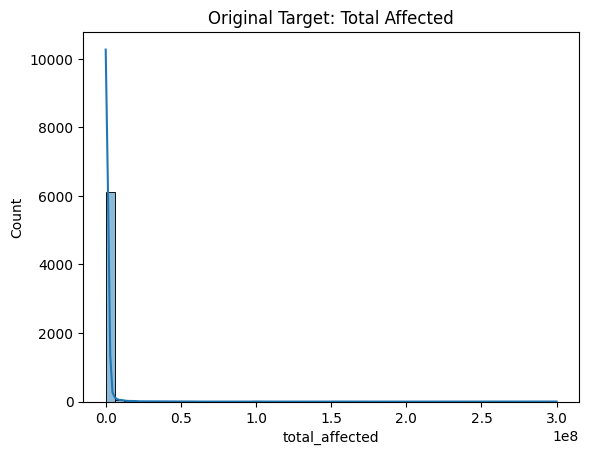

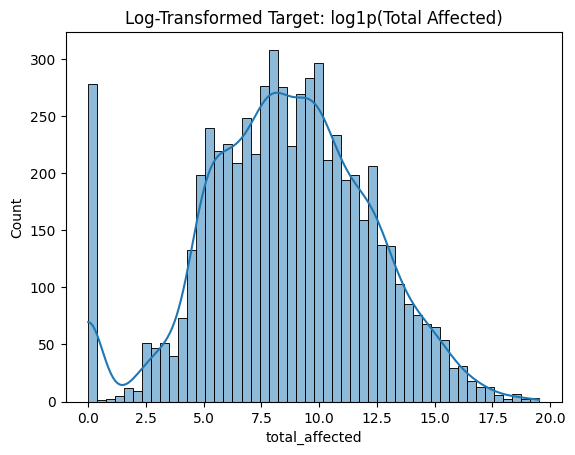

In [ ]:
sns.histplot(df['total_affected'], bins=50, kde=True)
plt.title("Original Target: Total Affected")
plt.show()

sns.histplot(np.log1p(df['total_affected']), bins=50, kde=True)
plt.title("Log-Transformed Target: log1p(Total Affected)")
plt.show()

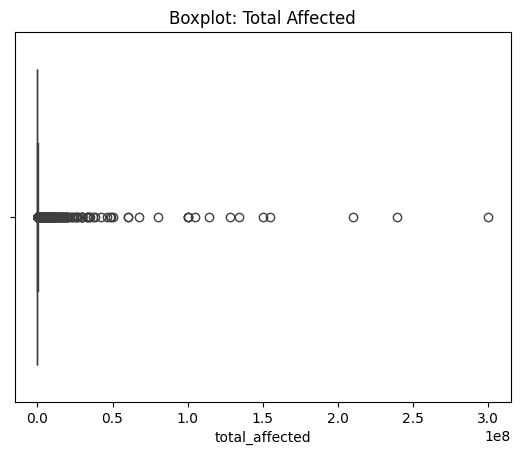

In [ ]:
sns.boxplot(x=df['total_affected'])
plt.title("Boxplot: Total Affected")
plt.show()


In [ ]:
# Remove extreme outliers (beyond 99th percentile)
outlier_thresh = df['total_affected'].quantile(0.99)
df = df[df['total_affected'] <= outlier_thresh]

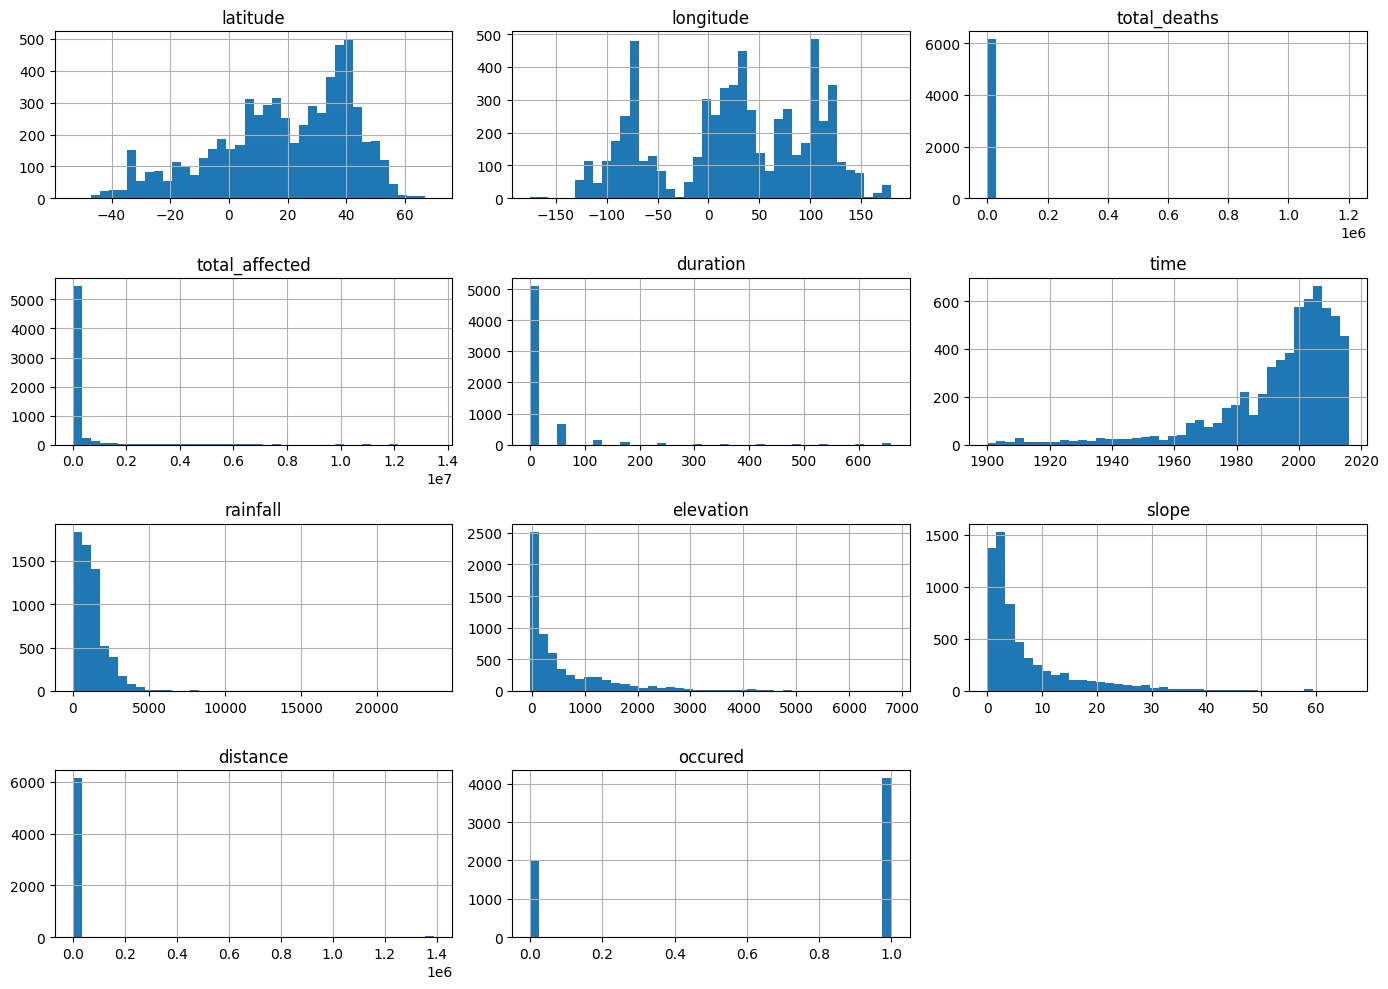

In [ ]:
# Histograms
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_cols].hist(figsize=(14,10), bins=40)
plt.tight_layout()
plt.show()


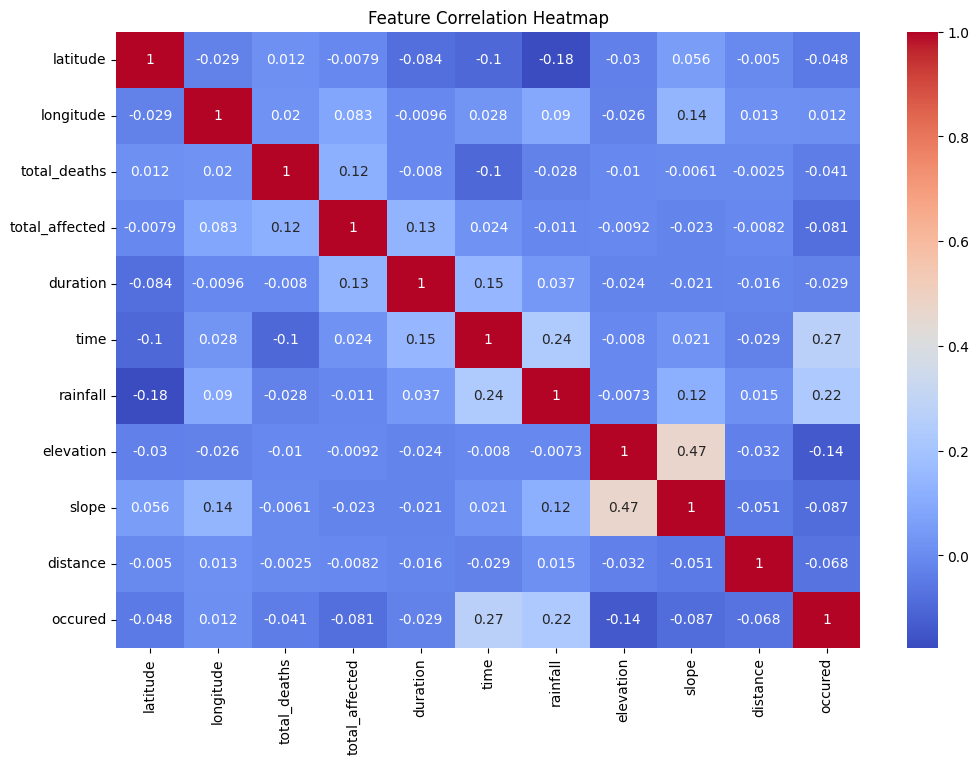

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
df.rename(columns={
    'time': 'Year',

}, inplace=True)


In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


In [ ]:
df.head()

,latitude,longitude,total_deaths,total_affected,duration,year,rainfall,elevation,slope,distance,occured
0,52.6717,-0.2995,300.0,3000.0,0.0,1900.0,1383.125626,11.0,1.788207,0.0,1.0
1,35.6897,139.6920,1379.0,13790.0,0.0,1909.0,1383.125626,49.0,24.356508,0.0,1.0
2,39.9050,116.3910,100000.0,1000000.0,0.0,1909.0,580.345856,55.0,8.374380,0.0,1.0
3,23.1288,113.2590,0.0,3000000.0,0.0,1912.0,2993.401777,7.0,12.917221,0.0,1.0
4,39.1467,117.2060,0.0,635000.0,0.0,1913.0,1383.125626,3.0,1.513093,0.0,1.0


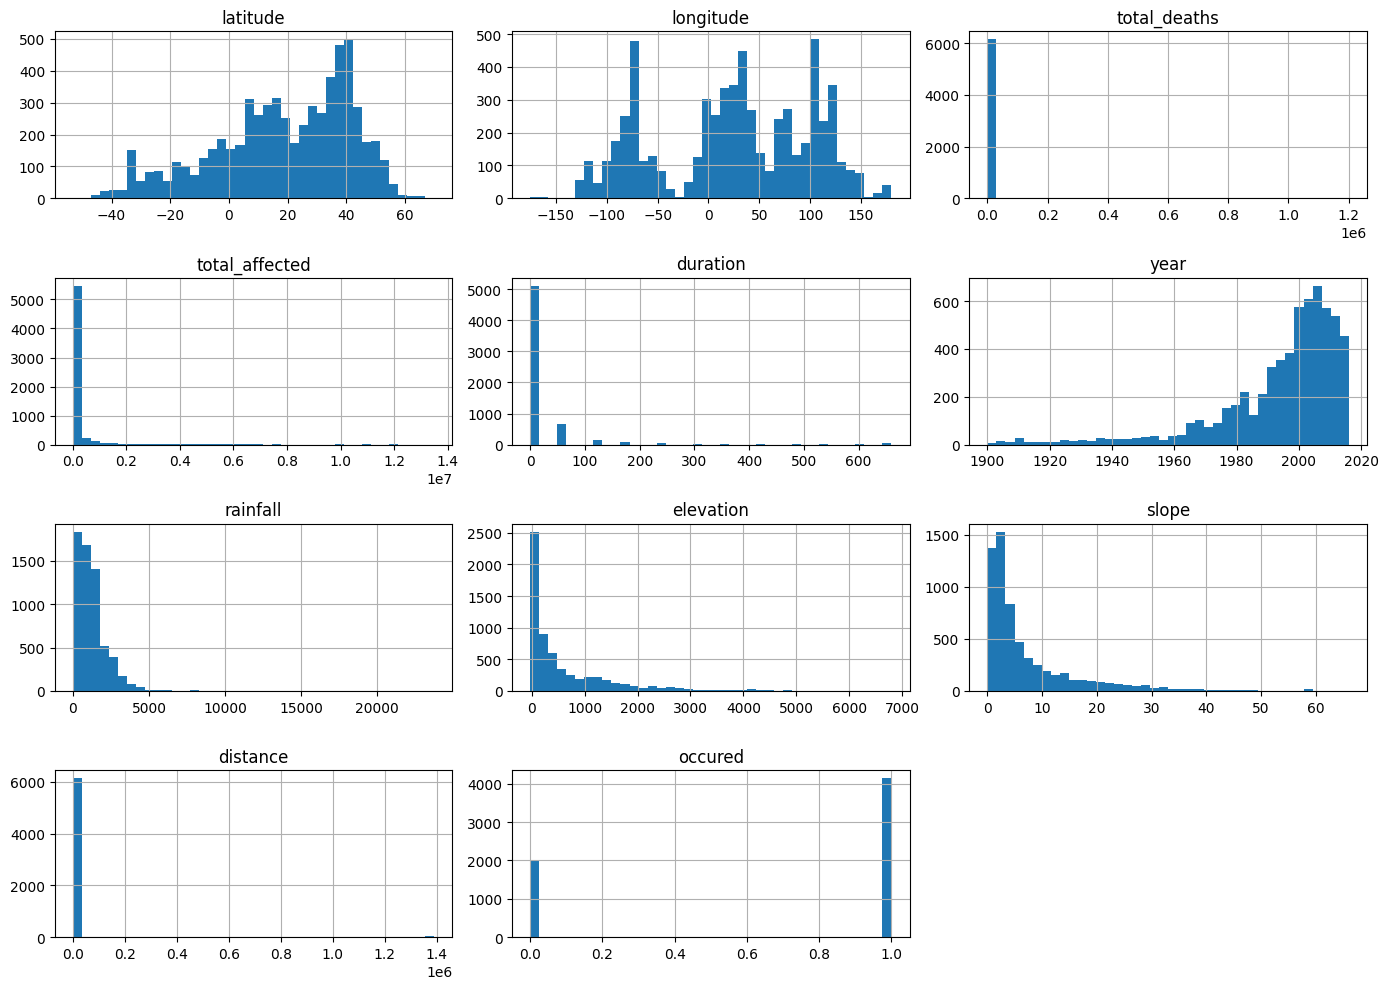

In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_cols].hist(figsize=(14,10), bins=40)
plt.tight_layout()
plt.show()


Feature Engineering

In [ ]:
# Convert only numeric-like columns to float
for col in df.columns:
    try:
        df[col] = df[col].astype(float)
    except ValueError:
        print(f"Skipped column: {col}")


In [ ]:
df = df.apply(pd.to_numeric, errors='coerce')


In [ ]:
print(df.columns.tolist())




['latitude', 'longitude', 'total_deaths', 'total_affected', 'duration', 'year', 'rainfall', 'elevation', 'slope', 'distance', 'occured']


In [50]:
# 👇 STEP 2: Create binary classification target from 'occured'
# This assumes 'occured' is already 0 or 1, but we'll be safe and convert
df['is_flood'] = df['occured'].apply(lambda x: 1 if x > 0 else 0)

# Drop original target and unrelated columns
X = df.drop(columns=['occured', 'is_flood'])
y = df['is_flood']


In [49]:
from sklearn.model_selection import train_test_split
# Train-Test Split & Scaling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [51]:
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.median(numeric_only=True), inplace=True)


In [52]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [54]:
print("Any inf in X_train?", np.isinf(X_train).any().any())
print("Any NaN in X_train?", X_train.isna().any().any())
print("Max value in X_train:", X_train.max().max())
print("Min value in X_train:", X_train.min().min())

Any inf in X_train? False
Any NaN in X_train? False
Max value in X_train: 300000000.0
Min value in X_train: -170.7048298


In [53]:
# STEP 4: Train XGBoost Classifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

model = XGBClassifier(
    objective='binary:logistic',
    tree_method='gpu_hist',  # Use 'hist' if you're on CPU
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
model.fit(X_train_scaled, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:17:24] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:17:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [55]:
y_val_pred = model.predict(X_val_scaled)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation F1 Score:", f1_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))


Validation Accuracy: 1.0
Validation F1 Score: 1.0
Confusion Matrix:
 [[405   0]
 [  0 843]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:17:30] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


In [58]:
y_test_pred = model.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test F1 Score:", f1_score(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Test Accuracy: 1.0
Test F1 Score: 1.0
Test Confusion Matrix:
 [[383   0]
 [  0 865]]


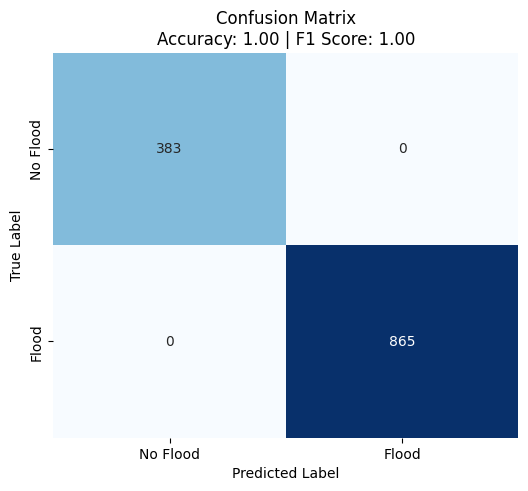

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# 1. Get predictions
y_pred = model.predict(X_test_scaled)

# 2. Compute metrics
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# 3. Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Flood', 'Flood'], yticklabels=['No Flood', 'Flood'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix\nAccuracy: {acc:.2f} | F1 Score: {f1:.2f}')
plt.show()


In [60]:
plt.savefig("confusion_matrix_flood.png")


<Figure size 640x480 with 0 Axes>

In [62]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
import time

start = time.time()

model_gpu = XGBClassifier(
    objective='binary:logistic',
    tree_method='gpu_hist',  # Uses GPU
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
model_gpu.fit(X_train_scaled, y_train)

end = time.time()
y_pred_gpu = model_gpu.predict(X_test_scaled)

print("🔹 GPU Training Time:", round(end - start, 2), "seconds")
print("GPU Accuracy:", accuracy_score(y_test, y_pred_gpu))
print("GPU F1 Score:", f1_score(y_test, y_pred_gpu))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:22:09] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:22:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🔹 GPU Training Time: 0.36 seconds
GPU Accuracy: 1.0
GPU F1 Score: 1.0


In [63]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

start = time.time()

model_mp = XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

scores = cross_val_score(model_mp, X_train_scaled, y_train, cv=5, scoring='f1', n_jobs=-1)

end = time.time()

print("🔹 Multiprocessing Cross-Validation Time:", round(end - start, 2), "seconds")
print("Cross-Validated F1 Scores:", scores)
print("Mean F1 Score:", scores.mean())


🔹 Multiprocessing Cross-Validation Time: 2.75 seconds
Cross-Validated F1 Scores: [1. 1. 1. 1. 1.]
Mean F1 Score: 1.0


In [65]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
import time

# Train model on CPU using histogram algorithm
start = time.time()

model_cpu = XGBClassifier(
    objective='binary:logistic',
    tree_method='hist',        # Efficient for CPU
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
model_cpu.fit(X_train_scaled, y_train)

end = time.time()

# Predict and evaluate
y_pred_cpu = model_cpu.predict(X_test_scaled)
acc_cpu = accuracy_score(y_test, y_pred_cpu)
f1_cpu = f1_score(y_test, y_pred_cpu)

print("🔹 CPU Training Time:", round(end - start, 2), "seconds")
print("CPU Accuracy:", acc_cpu)
print("CPU F1 Score:", f1_cpu)


🔹 CPU Training Time: 0.05 seconds
CPU Accuracy: 1.0
CPU F1 Score: 1.0


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:23:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [66]:
from sklearn.model_selection import cross_val_score

start = time.time()

model_cv_cpu = XGBClassifier(
    objective='binary:logistic',
    tree_method='hist',
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

f1_scores_cpu = cross_val_score(model_cv_cpu, X_train_scaled, y_train, cv=5, scoring='f1', n_jobs=-1)

end = time.time()

print("🔹 CPU CV Time (Multiprocessing):", round(end - start, 2), "seconds")
print("F1 Scores across folds:", f1_scores_cpu)
print("Mean F1 Score:", f1_scores_cpu.mean())


🔹 CPU CV Time (Multiprocessing): 0.18 seconds
F1 Scores across folds: [1. 1. 1. 1. 1.]
Mean F1 Score: 1.0
